# Health Care
- Diabetes

> Team Name : Srikanth, 

**Step -1 : Import datascience libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

**Step -2 : Load Dataset**

In [2]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_fb06aebe588d4dd2a8db6be404ade245 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3m-AFoTmMZeWg53cRinc88OWUdWAx1k09FTdLCnuMNkH',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fb06aebe588d4dd2a8db6be404ade245.get_object(Bucket='teamb400smartbridge-donotdelete-pr-bec5dlak7ceaf0',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> **Step - 3 : Data Preprocessing**

In [3]:
# checking for missing values
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Co-relation**

In [4]:
dataset = df_data_1.copy()

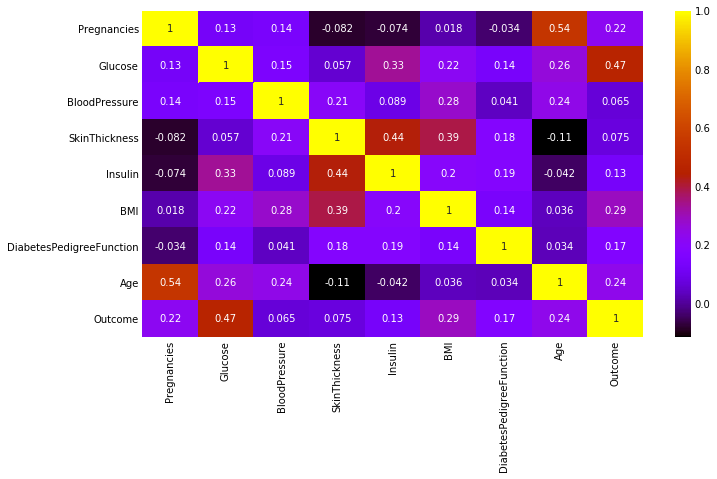

In [8]:
plt.figure(figsize=(10,6))
corr = dataset.corr()
sns.heatmap(corr,annot=True,cmap ='gnuplot')
plt.show()

> Extracting independent and dependent variable

In [10]:
X = dataset.iloc[:,:-1].values # independent variable
y = dataset.iloc[:,-1].values # dependent variable

**Box Plot**

In [15]:
dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

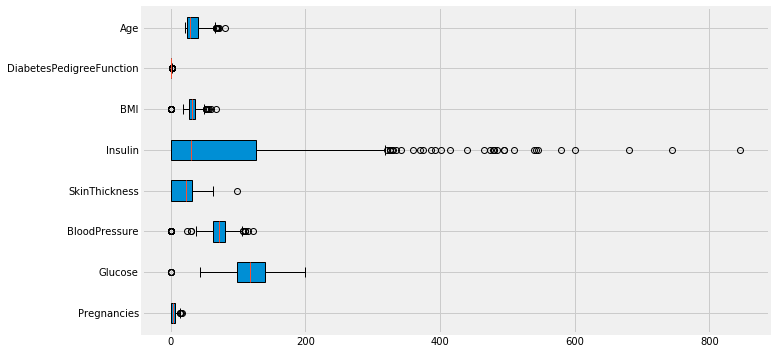

In [17]:
plt.figure(figsize=(10,6))
plt.boxplot(X,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()

> **Feature Scaling**
- Normalization (0 - 1)
- Standard Scaler (Z - score)

In [18]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [19]:
mms = MinMaxScaler() # 0 -1 
sc = StandardScaler() # z score

In [20]:
X_norm = mms.fit_transform(X)
X_sc = sc.fit_transform(X)

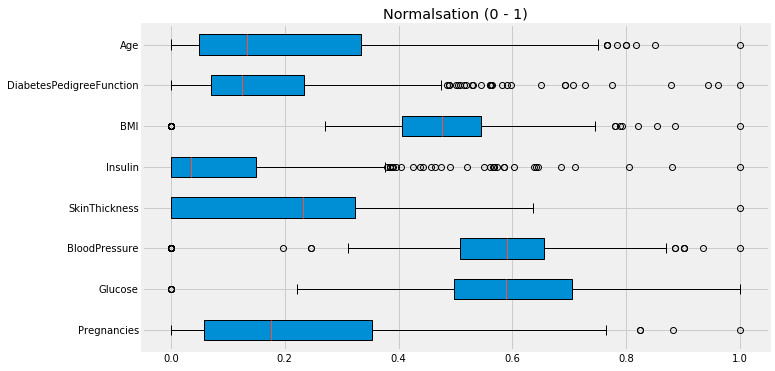

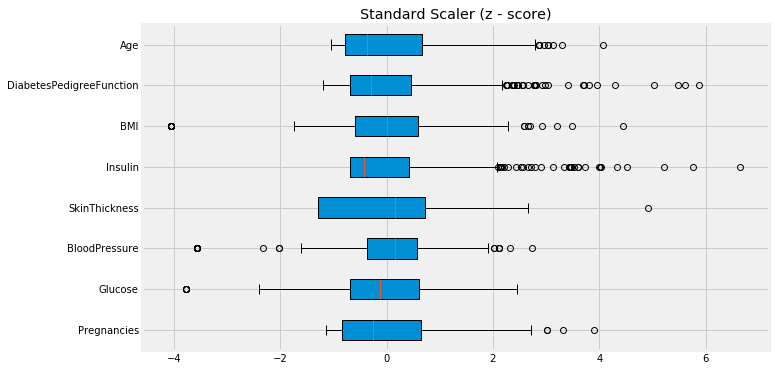

In [21]:
plt.figure(figsize=(10,6))
plt.boxplot(X_norm,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Normalsation (0 - 1)')
plt.show()

plt.figure(figsize=(10,6))
plt.boxplot(X_sc,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Standard Scaler (z - score)')
plt.show()

>  **Removing Outliers**

In [81]:
Xo_sc = np.zeros((1,X_sc.shape[1]))
yo = np.zeros(1)
for i in range(len(X_sc)):
    if np.abs(X_sc[i:i+1]).max() < 3:
        Xo_sc = np.append(Xo_sc,X_sc[i:i+1],axis = 0)
        yo = np.append(yo,y[i])
        
Xo_sc = Xo_sc[1:]
yo = yo[1:]
Xo_sc.shape, yo.shape

((688, 8), (688,))

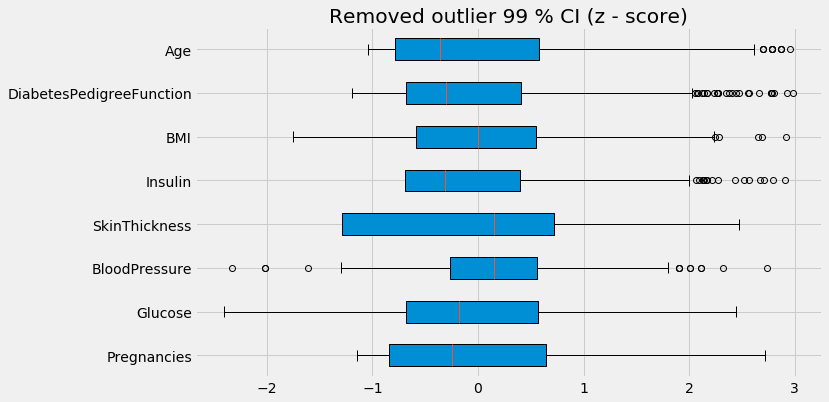

In [83]:
plt.figure(figsize=(10,6))
plt.boxplot(Xo_sc,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Removed outlier 99 % CI (z - score)')
plt.show()

> ** Step : 4 - Splitting data into training and testing**

In [95]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2,
                                                   random_state=0)

In [96]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

> ** Step: 5 - Buliding Machine Learning model**
    - Logistic Regression, KNearestNeighbour, Support Vector Mahcine, Decision Tree, Random Forest
    

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
model_log = LogisticRegression(C = 10.0) # Creating LR model
model_knn = KNeighborsClassifier(n_neighbors=3) # KNN
model_svm = SVC(C=10.0,kernel='rbf') # SVM
model_dt = DecisionTreeClassifier() # Decision Tree
model_rf = RandomForestClassifier(n_estimators=100) # Random Forest

***Training Model***

In [99]:
model_log.fit(x_train,y_train) # fitting  Logistic model
model_knn.fit(x_train,y_train) # fitting KNN model
model_svm.fit(x_train,y_train) # fitting SVM model
model_dt.fit(x_train,y_train) # fitting DT model
model_rf.fit(x_train,y_train) # fitting RF model
print('Models Trained Sucessfully !!!')

Models Trained Sucessfully !!!


> ** Step : 6 - Model Evaluation**

- Confusion Matrix
- Classification Report

In [100]:
y_pred_log = model_log.predict(x_test) # predicted results
y_pred_knn = model_knn.predict(x_test) # predicted results
y_pred_svm = model_svm.predict(x_test) # predicted results
y_pred_dt = model_dt.predict(x_test) # predicted results
y_pred_rf = model_rf.predict(x_test) # predicted results

In [101]:
from sklearn.metrics import confusion_matrix , classification_report

In [102]:
cm_log = confusion_matrix(y_test,y_pred_log) # logistic regression
cm_knn = confusion_matrix(y_test,y_pred_knn) # knn
cm_svm = confusion_matrix(y_test,y_pred_svm) # svm
cm_dt = confusion_matrix(y_test,y_pred_dt) # decision tree
cm_rf = confusion_matrix(y_test,y_pred_rf) # random forest

In [103]:
import seaborn as sns

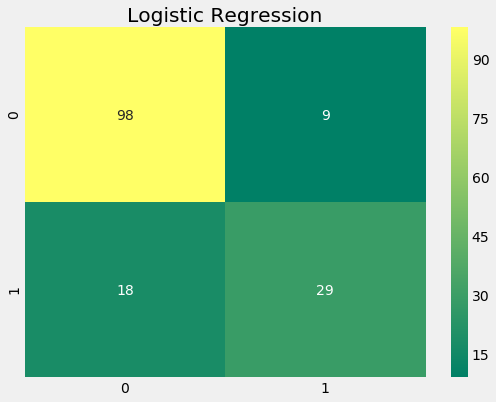

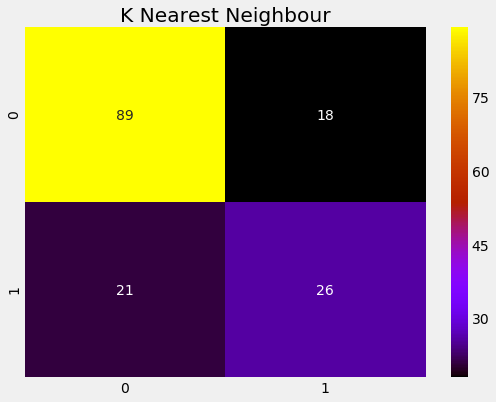

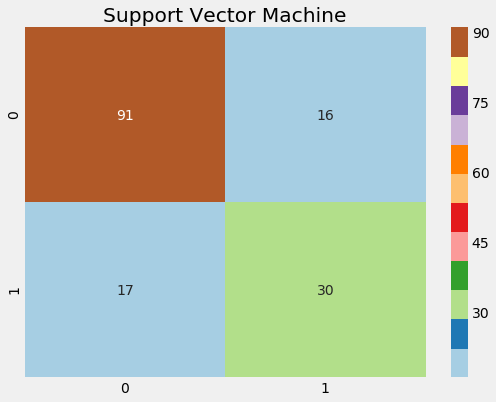

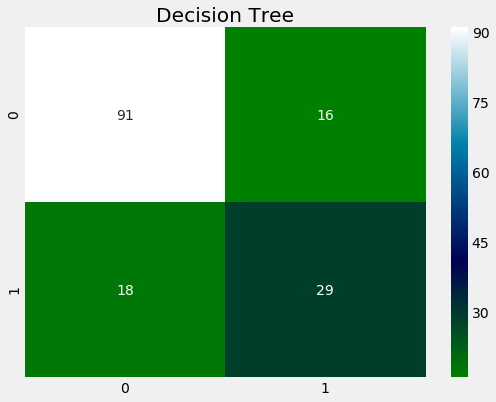

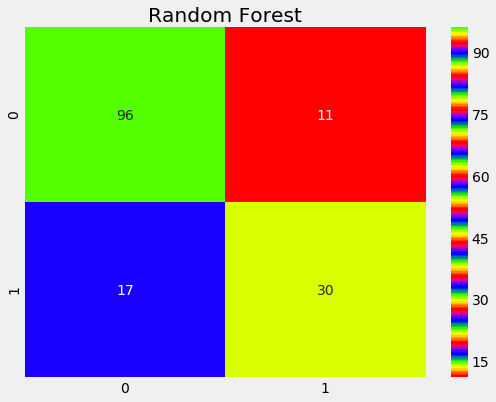

In [104]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_log,annot=True,cmap='summer')
plt.title('Logistic Regression')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn,annot=True,cmap='gnuplot')
plt.title('K Nearest Neighbour')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm,annot=True,cmap='Paired')
plt.title('Support Vector Machine')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_dt,annot=True,cmap='ocean')
plt.title('Decision Tree')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf,annot=True,cmap='prism')
plt.title('Random Forest')
plt.show()

In [105]:
cr_log = classification_report(y_test,y_pred_log)
print('\n'+'='*20+ 'Logistic Regression'+ "="*20+'\n')
print(cr_log)
cr_knn = classification_report(y_test,y_pred_knn)
print('\n'+'='*20+ 'K Nearest Neighbour'+ "="*20+'\n')
print(cr_knn)
cr_svm = classification_report(y_test,y_pred_svm)
print('\n'+'='*20+ 'Support Vector Machine'+ "="*20+'\n')
print(cr_svm)
cr_dt = classification_report(y_test,y_pred_dt)
print('\n'+'='*20+ 'Decision Tree'+ "="*20+'\n')
print(cr_dt)
cr_rf = classification_report(y_test,y_pred_rf)
print('\n'+'='*20+ 'Random Forest'+ "="*20+'\n')
print(cr_rf)


====================Logistic Regression====================

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.62      0.68        47

avg / total       0.82      0.82      0.82       154


====================K Nearest Neighbour====================

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       107
          1       0.59      0.55      0.57        47

avg / total       0.74      0.75      0.74       154


====================Support Vector Machine====================

             precision    recall  f1-score   support

          0       0.84      0.85      0.85       107
          1       0.65      0.64      0.65        47

avg / total       0.78      0.79      0.79       154


====================Decision Tree====================

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       107
   

# Watson Machine Learning Deployment

### Work with your WML instance<a id="work"></a>

First, you must import client libraries.

In [108]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [109]:
wml_credentials = {
  "username": "d7a4539f-c470-4b78-a066-9ebaf94b4b71",
  "password": "1d226f1d-0aa7-4f6d-be79-fdcb3568bd6e",
  "instance_id": "76e633c1-a0d6-4096-9086-c9e23af8ef18",
  "url": "https://ibm-watson-ml.eu-gb.bluemix.net"
}

#### Create the API client. 

In [110]:
client = WatsonMachineLearningAPIClient(wml_credentials)

#### Get instance details.

In [111]:
import json

instance_details = client.service_instance.get_details()

###  Save the model to the WML repository<a id="save"></a>

Define the model name, author name and email.

In [115]:
published_model = client.repository.store_model(model=model_log, meta_props={'name':'Healt Score - Diabetes'}, \
                                                training_data=x_train, training_target=y_train)

#### Get information about a specific model in the WML repository.

In [116]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

{
  "entity": {
    "model_type": "scikit-learn-0.19",
    "evaluation_metrics_url": "https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/76e633c1-a0d6-4096-9086-c9e23af8ef18/published_models/ed5ac08e-f991-4971-a52d-3a7da66a8f8f/evaluation_metrics",
    "learning_configuration_url": "https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/76e633c1-a0d6-4096-9086-c9e23af8ef18/published_models/ed5ac08e-f991-4971-a52d-3a7da66a8f8f/learning_configuration",
    "feedback_url": "https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/76e633c1-a0d6-4096-9086-c9e23af8ef18/published_models/ed5ac08e-f991-4971-a52d-3a7da66a8f8f/feedback",
    "input_data_schema": {
      "features": {
        "type": "ndarray",
        "fields": [
          {
            "type": "float",
            "name": "f0"
          },
          {
            "type": "float",
            "name": "f1"
          },
          {
            "type": "float",
            "name": "f2"
          },
          {
            "t

#### Get information about all of the models in the WML repository.

In [117]:
models_details = client.repository.list_models()

------------------------------------  ----------------------  ------------------------  -----------------
GUID                                  NAME                    CREATED                   FRAMEWORK
b473bcdf-b7d3-4cec-b36c-17c1ab4790c1  Healt Score - Diabetes  2018-06-19T11:26:06.449Z  scikit-learn-0.19
ed5ac08e-f991-4971-a52d-3a7da66a8f8f  Healt Score - Diabetes  2018-06-19T11:33:25.412Z  scikit-learn-0.19
------------------------------------  ----------------------  ------------------------  -----------------


### Load a model from the WML repository<a id="load"></a>

In this subsection you will learn how to load a saved model from a specific WML instance.

In [118]:
loaded_model = client.repository.load(published_model_uid)

Make test predictions to check that the model has been loaded correctly.

In [119]:
test_predictions = loaded_model.predict(x_test[:5])

In [120]:
print(test_predictions)

[1 0 0 1 0]


As you can see you are able to make predictions, which means that the model has loaded correctly. You have now  learned how save to and load the model from the WML repository.

###  Delete a model from the WML repository<a id="delete"></a>

The code in the following cell deletes a published model from the WML repository. The code is commented out at this stage because you still need the model for deployment.

In [ ]:
# client.repository.delete(published_model_uid)

<a id="scoring"></a>
##  Deploy and score data in the IBM Cloud

### Create the online deployment for the published model<a id="create"></a>

In [121]:
created_deployment = client.deployments.create(published_model_uid, "Diabetes")



#######################################################################################

Synchronous deployment creation for uid: 'ed5ac08e-f991-4971-a52d-3a7da66a8f8f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6fbd7524-917d-4340-b915-1f9b0b4f0c63'
------------------------------------------------------------------------------------------------




**Note**: Here you use the deployment url saved in published_model object. The next section shows you how to retrieve the deployment url from WML instance.

Now you can define and print an online scoring endpoint. 

In [122]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

print(scoring_endpoint)

https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/76e633c1-a0d6-4096-9086-c9e23af8ef18/published_models/ed5ac08e-f991-4971-a52d-3a7da66a8f8f/deployments/6fbd7524-917d-4340-b915-1f9b0b4f0c63/online


# z - values

In [128]:
print('Mean \n',sc.mean_)
print('Standard Deviation \n',sc.scale_)

Mean 
 [   3.84505208  120.89453125   69.10546875   20.53645833   79.79947917
   31.99257812    0.4718763    33.24088542]
Standard Deviation 
 [   3.36738361   31.95179591   19.34320163   15.94182863  115.16894926
    7.87902573    0.33111282   11.75257265]


In [129]:
X_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ..., 
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])